Iteration 1: Cost 3184.9985302999994, Weight         0.15193436974000002, Bias 0.010976932
Iteration 2: Cost 2925.150667562634, Weight         0.20003210087980022, Bias 0.011896899463627484
Iteration 3: Cost 2702.2743881524107, Weight         0.24457660746509982, Bias 0.012764110327665529
Iteration 4: Cost 2511.109228342534, Weight         0.285830367631435, Bias 0.013582461686905642
Iteration 5: Cost 2347.1432040804407, Weight         0.3240364701483287, Bias 0.014355562756171388
Iteration 6: Cost 2206.5063143266957, Weight         0.359420046719599, Bias 0.015086756136128025
Iteration 7: Cost 2085.8791971618607, Weight         0.39218959847906376, Bias 0.015779137508178196
Iteration 8: Cost 1982.4147826652884, Weight         0.422538224497472, Bias 0.01643557387448771
Iteration 9: Cost 1893.671093333542, Weight         0.4506447595391311, Bias 0.017058720450613234
Iteration 10: Cost 1817.5536059221952, Weight         0.4766748277719914, Bias 0.017651036310264753
Iteration 11: Cost 17

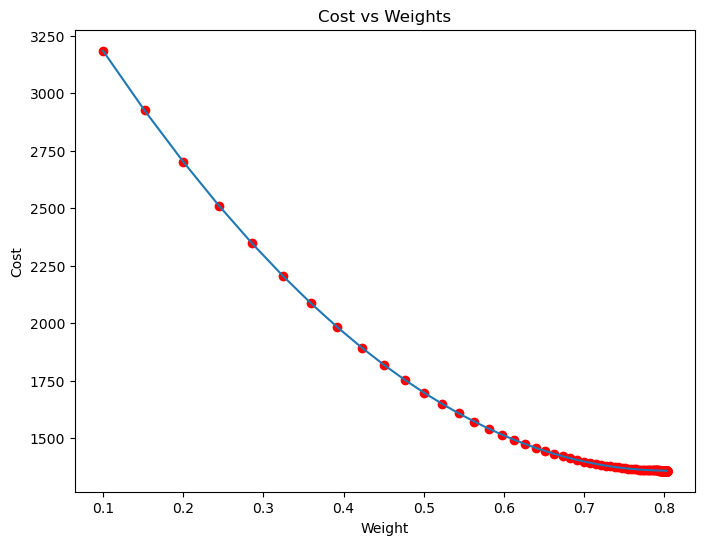

Estimated Weight: 0.8024773687343557
Estimated Bias: 0.06158390628211149


In [11]:
# Gradient descent implementation 

import numpy as np
import matplotlib.pyplot as plt

#function calculate lost function 
def mean_squared_error(y_true, y_predicted):
    
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost
 
# Gradient Descent Function
# iterations, learning_rate, stopping_threshold
def gradient_descent(X, y, iterations = 100, learning_rate = 0.00001,
                     stopping_threshold = 1e-5):
     
    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(X))
     
    costs = []
    weights = []
    previous_cost = None
     
    # Estimation of optimal parameters
    for i in range(iterations):
         
        # calculat predictions
        y_predicted = (current_weight * X) + current_bias
         
        # Calculating the cost function 
        current_cost = mean_squared_error(y, y_predicted)
  
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(current_weight)
         
        # Calculating the gradients
        weight_derivative = -(2/n) * sum(X* (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
         
        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
                 
        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")
     
     
    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
     
    return current_weight, current_bias
 
def main():
     
    # Data
    X = np.array([23.50, 35.42, 16.53, 73.33, 95.43,
           34.14, 25.45, 93.32, 84.14, 25.54,
           54.41, 45.33, 34.12 , 85.26, 65.72,
           84.43, 67.65, 43.22, 25.65, 83.89])
    Y = np.array([13.70, 86.74, 26.53 , 17.54, 78.21,
           45.26, 97.65, 95.71, 57.43 ,47.38,
           58.62, 28.74, 65.98, 34.45, 18.46,
           34.73, 28.37, 97.35, 87.95, 65.98])
 
    # Estimating weight and bias using gradient descent
    estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=200)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")
 
    
if __name__=="__main__":
    main()